In [1]:
%pylab inline

from matplotlib.mlab import griddata
from PyTools import nbins
from scipy.ndimage.filters import gaussian_filter

Populating the interactive namespace from numpy and matplotlib


In [14]:
rc("lines", linewidth=1.0)
rc("patch", linewidth=1.0)
rc("font", family="serif", serif="Times New Roman", size=10)
rc("axes", linewidth=0.5, labelsize=10, titlesize=10)
rc("text", usetex=True)
rc("savefig", dpi=92)
rc("legend", fontsize="xx-small")
rc("xtick", labelsize="small")
rc("ytick", labelsize="small")

In [15]:
u_obs, g_obs, r_obs, i_obs, z_obs, redshift = loadtxt("../../degree_thesis/data/photometry/total_photometry.txt", usecols=range(1, 6)+[11], unpack=True)
u_obf, g_obf, r_obf, i_obf, z_obf, rs_sam = loadtxt("../outputs/real_deal6/ugriz_catalog_of.txt", usecols=range(1, 6)+[11], unpack=True)
u_ref, g_ref, r_ref, i_ref, z_ref = loadtxt("../outputs/real_deal6/ugriz_catalog_rf.txt", usecols=range(1, 6), unpack=True)
u_lib, g_lib, r_lib, i_lib, z_lib = loadtxt("../inputs/set3_catalog.txt", usecols=range(39, 39 + 5), unpack=True)

In [16]:
zmask = redshift < 0.03
ocolor_x = (u_obs - g_obs)[zmask]
ocolor_y = (g_obs - r_obs)[zmask]
icolor_x = u_obf - g_obf
icolor_y = g_obf - r_obf
kcolor_x = u_ref - g_ref
kcolor_y = g_ref - r_ref
lcolor_x = u_lib - g_lib
lcolor_y = g_lib - r_lib

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in subtract
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in subtract
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in subtract
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: invalid value encountered in subtract


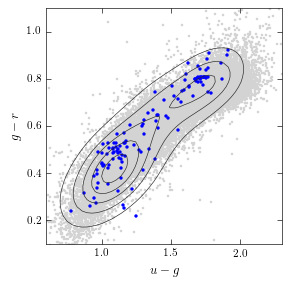

In [18]:
fig = figure(figsize=(3.3, 3.3))
xlm = array((0.6, 2.3))
ylm = array((0.1, 1.1))
axs = subplot(111, xlim=xlm, ylim=ylm)

axs.set_xlabel(r"$u-g$")
axs.set_ylabel(r"$g-r$")

nx, xi, xf, bsx = nbins(ocolor_x)
ny, yi, yf, bsy = nbins(ocolor_y)

xbin = linspace(xi, xf, 51)
ybin = linspace(yi, yf, 51)

H, xe, ye = histogram2d(ocolor_x, ocolor_y, bins=(nx, ny), normed=True)
H = gaussian_filter(H, sigma=3)

mask = rs_sam < 10

#axs.scatter(icolor_x[mask], icolor_y[mask], lw=0, c="lightgray", s=4)
axs.scatter(kcolor_x[mask], kcolor_y[mask], lw=0, c="lightgray", s=4)
axs.scatter(lcolor_x, lcolor_y, lw=0, c="b", s=7)

cont = axs.contour(xe[:- 1], ye[:- 1], H.T, 5, colors="0.15", linewidths=0.5)
#clabel(cont, inline=True, fmt="%.1f", fontsize=9, use_clabeltext=True)

#savefig("kcorr_eval.png", bbox_inches="tight")
savefig("samples.pdf", facecolor="#C4C4C0", edgecolor="none", bbox_inches="tight")